# **DATA ANALYTICS PROJECTS**
## ***STROKE PREDICTION***
---
Objective: using EDA to explore, attempt cleaning and analyzing data to having an understading of factors that affect the probability of having a stroke.

First, import basic data necessary for processing and visualising data.


In [309]:
import pandas as pd # working with data
import matplotlib
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

##I. **DATA EXPLORATION**
Let's read the dataset and have a look at all the basic information


In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

In [312]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [313]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


> Through observation, the **ID** variable doesn't contributing in analyzing this dataset so we can drop it.



In [314]:
df.drop('id',axis = 1, inplace = True)


In [315]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Now, let's check on the number of columns we have.


In [316]:
print(df.columns)
print(len(df.columns))

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
11


> This dataset has **11** columns including the variable **stroke** which determine if the person have had a stroke or not.

Let's check out the dataset information

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [318]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

> We can see that this dataset has both numerical and categorical variables. There are also missing values since the number of non-null value does not match the number off entries.

> However, **age** should not be a float variable but rather integer.**hypertension**, **heart_disease** and **stroke** are all boolean variable rather then integer so they more fit to be analyze as categorical variable. **gender** and **smoking_status** seem to have more unique value than needed. hence they all need to be checked


As to make it easier, we first change the variable with boolean value in to categorical

In [319]:
lst = ['hypertension','heart_disease','stroke']
df[lst] = df[lst].astype('object')


In [320]:
a = df['age'].astype(int)
df_float_age = df[(df['age']-a) > 0]
df_float_age.describe()

,age,avg_glucose_level,bmi
count,115.000000,115.000000,109.000000
mean,1.130435,95.134348,18.411927
std,0.542796,28.769627,2.985419
min,0.080000,55.510000,10.300000
25%,0.680000,73.050000,16.700000
50%,1.240000,89.280000,18.500000
75%,1.640000,112.190000,20.100000
max,1.880000,170.880000,33.100000


> we can see from the output that there are 115 value of a person's age that was recorded wrong and they all vary between 0.08 and 1.88 which is extremely small.

In [321]:
print(df_float_age['work_type'].value_counts())
print(df_float_age['stroke'].value_counts())

children    115
Name: work_type, dtype: int64
0    114
1      1
Name: stroke, dtype: int64


> This show that all these records are those of children and combine with the age range above, they are all most likely infant and the chance of them getting a stroke is very low.
> The probability is also calculated and it is 1 out of 115 which is approximately 0.008 %.

>  Therefore, it seem unreasonable for these records to be used in our analysis since **age** is a crucial factor affecting a person's chance of having a stroke.

We are going to remove these records and change **age** to an integer variable now

In [322]:
df.drop(df_float_age.index, inplace = True)
df['age'] = df['age'].astype(int)

Next, we create 2 table to categorised our variables to make the analysis easier given the difference in their characteristics.


In [323]:
# List of categorical variables
categorical = [i for i in df.columns if df[i].dtypes == 'object']
# List of numerical variables
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'] 
 numerical:  ['age', 'avg_glucose_level', 'bmi']


> There are 8 categorical and 3 numerical variables.

Let's check the number of null values of the categorical variables

In [324]:
df[categorical].describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,4995,4995,4995,4995,4995,4995,4995,4995
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2938,4497,4719,3353,2925,2537,1892,4747


> From this we can see the most frequent value of each variable and their frequency

In [325]:
df['gender'].value_counts()

Female    2938
Male      2056
Other        1
Name: gender, dtype: int64

In [326]:
df[categorical].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
stroke            0
dtype: int64

> There are no missing values in this

Let's check out all the unique value for these variable

In [327]:
for x in df[categorical]:
  print(x, ':', list(sorted(df[x].unique())))

gender : ['Female', 'Male', 'Other']
hypertension : [0, 1]
heart_disease : [0, 1]
ever_married : ['No', 'Yes']
work_type : ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Residence_type : ['Rural', 'Urban']
smoking_status : ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
stroke : [0, 1]


> **gender** has the value '*other*' which might be unsual in such analysis, however, that can potentially affect the probability of having a stroke

> **Smoking_status** have the value '*Unknown*' which is a null values interms of meaning, so we need to look more into it

In [328]:
print(df['smoking_status'].value_counts())

never smoked       1892
Unknown            1429
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


> It is shown that we have 1429 values '*Unknown*'. As of now, we will keep on inspecting the dataset to decide if It is going to be a big factor that can disturb the analysis.


In [329]:
unknow = df[df['smoking_status'] == 'Unknown']
print(unknow['stroke'].value_counts())

0    1383
1      46
Name: stroke, dtype: int64


> According to the output, It can be seen that the number of people who had a stroke is very small compare to the number of the people who didn't. Hence, among these cases, the '*Unknown*' status will not significantly affect our overall analysis or the correlation between **stroke** and **smoking_status**

Now let's plot all the variable to eplore them

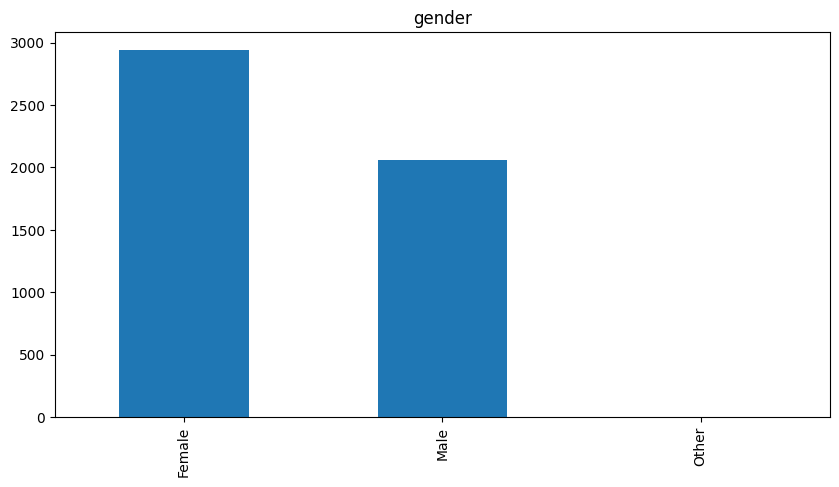

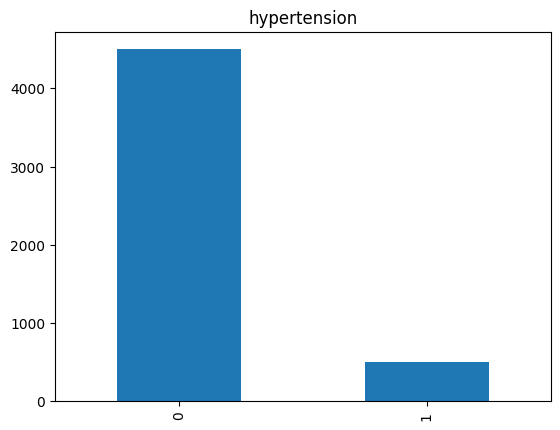

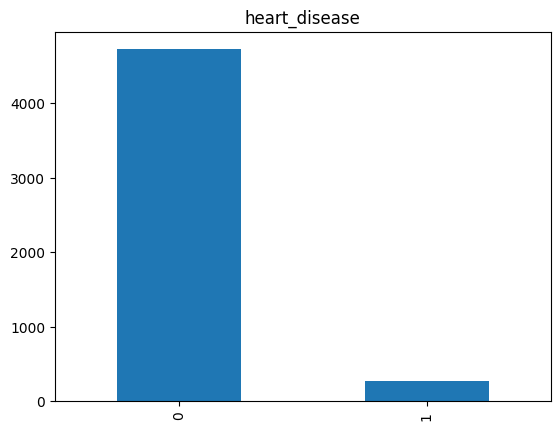

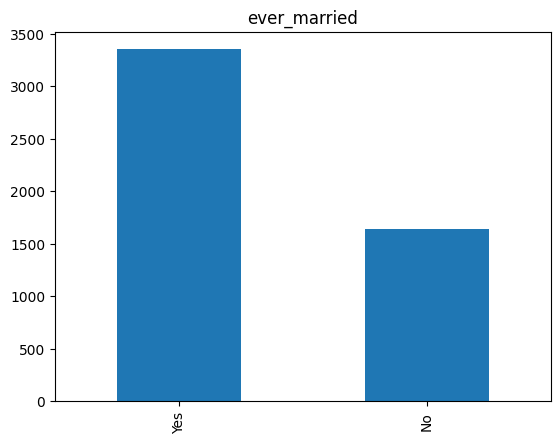

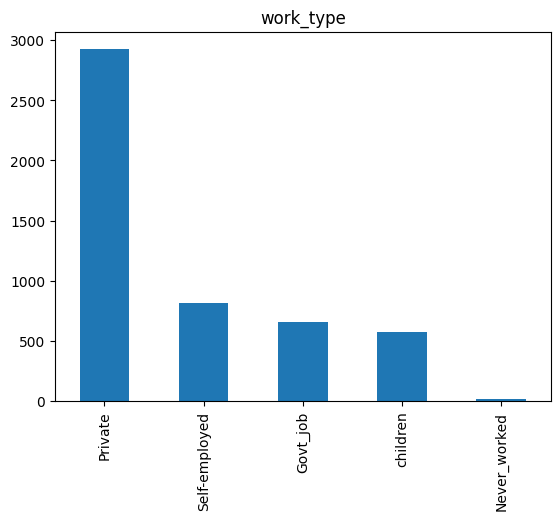

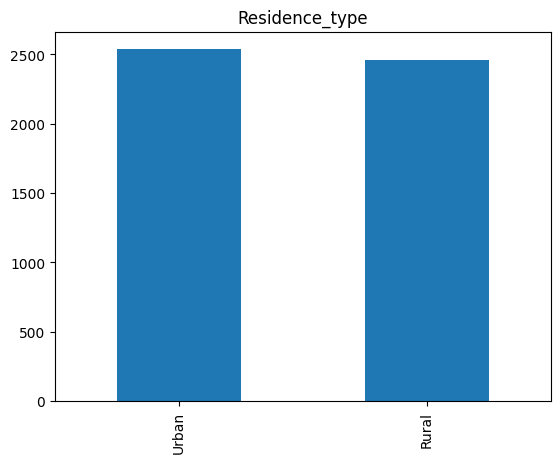

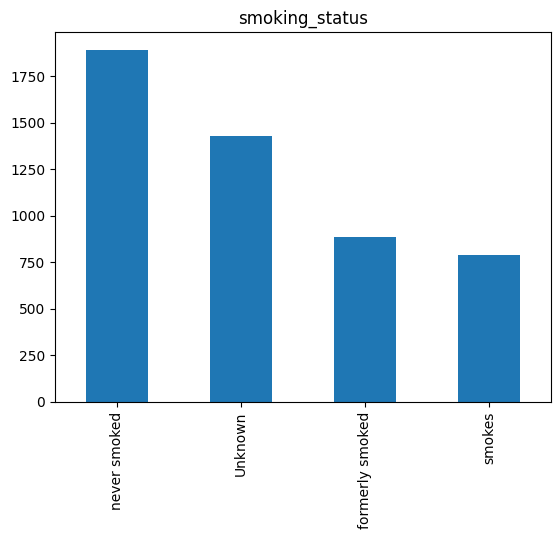

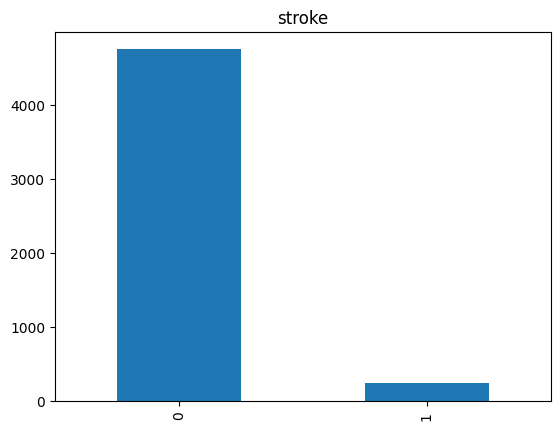

In [330]:
plt.figure(figsize=(10,5))
for x in categorical:
      df[x].value_counts().plot.bar()
      plt.title(x)

      plt.show()

> The **ever_maried**, **hypertension**, **heart_disease**, **work_type** and **stroke** plots show quite a big difference between variable which might have to be taken in to consideration to avoid the data being bias.

> The '*Other*' value in **gender** does not appear much in the data set so we are going to check it out

In [331]:
df['gender'].value_counts()

Female    2938
Male      2056
Other        1
Name: gender, dtype: int64

> Since it only appears once it is safe to say it won't make mảo impact on the dataset, hence we can remove it.

In [332]:
other = df[df['gender'] == 'Other']
df.drop(other.index, axis = 0, inplace = True)

Next we inspect the numerical data

In [333]:
df[numerical].isnull().sum()

age                    0
avg_glucose_level      0
bmi                  195
dtype: int64

> As can be seen, **bmi** is the only variable that have a considerable number of null values.



In [334]:
round(df[numerical].isnull().sum()/5110, 4)

age                  0.0000
avg_glucose_level    0.0000
bmi                  0.0382
dtype: float64

> However, the missing rate of **bmi** is not much since It is only approximately 4%.

For now, let's look at some of the data statistic

In [335]:
df[numerical].describe()

,age,avg_glucose_level,bmi
count,4994.000000,4994.000000,4799.000000
mean,44.199439,106.393843,29.132653
std,21.940451,45.565475,7.767762
min,1.000000,55.120000,11.300000
25%,27.000000,77.355000,23.900000
50%,45.000000,91.925000,28.300000
75%,61.000000,114.160000,33.200000
max,82.000000,271.740000,97.600000


> The table show that our data have different ranges.

Let's draw some boxplot to inspect these differences

<Axes: >

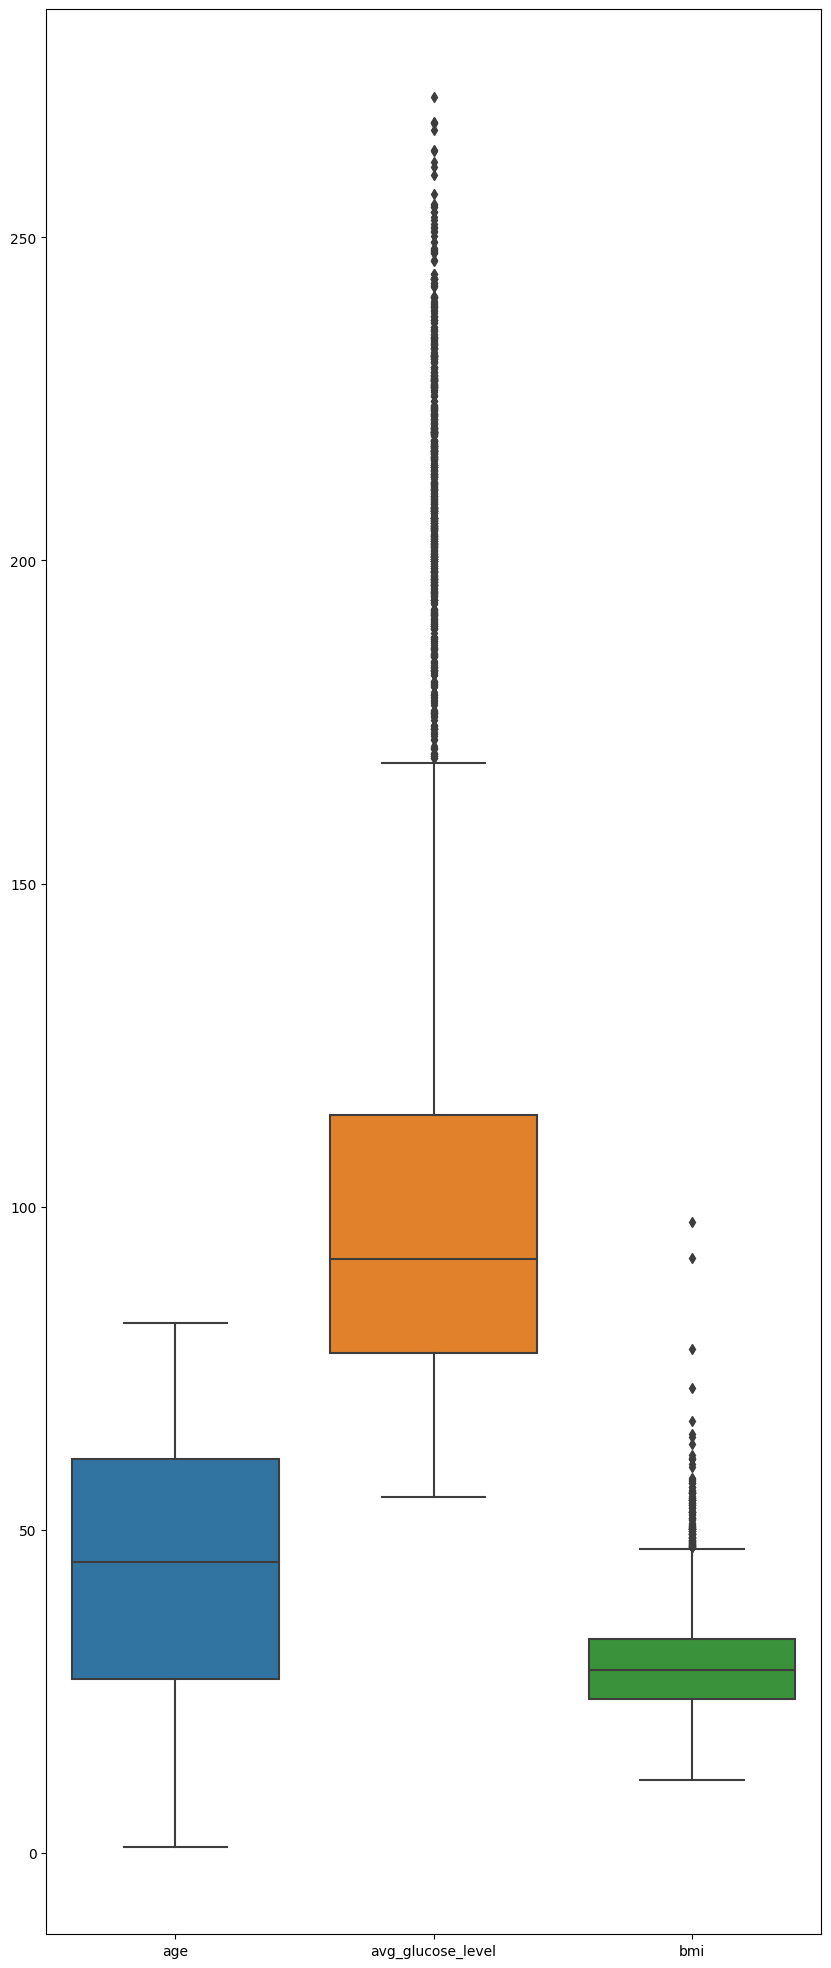

In [336]:
plt.figure(figsize = (10,25))
sns.boxplot(data = df[numerical])

> This plot review a significant number of outlier in **avg_glucose_level** and **bmi**

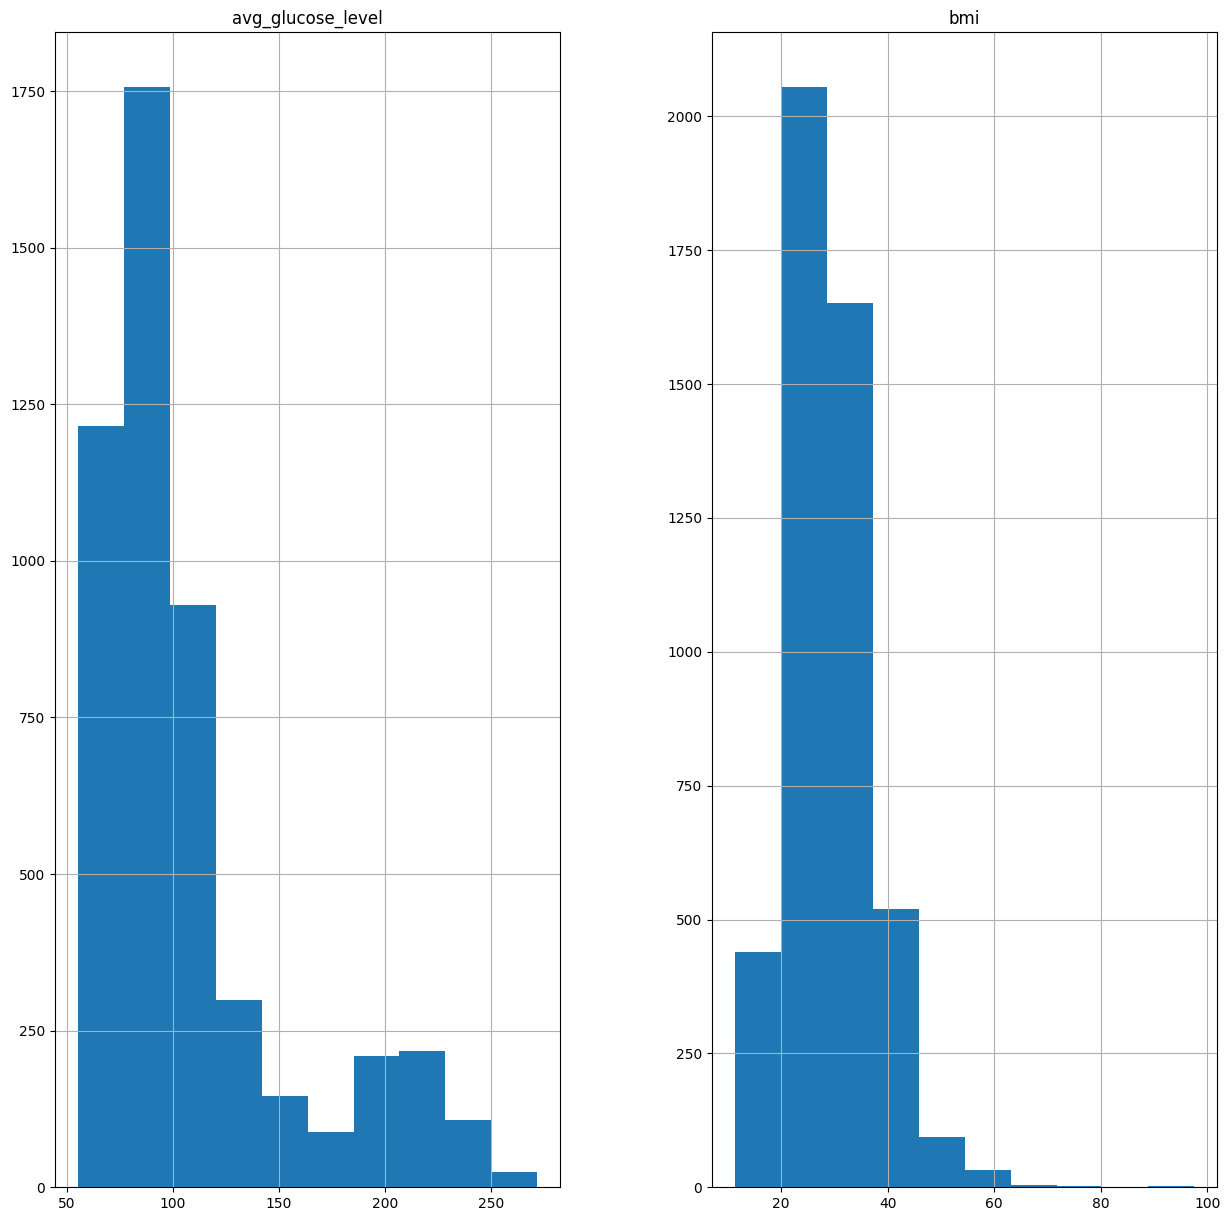

In [337]:
outlier = ['avg_glucose_level', 'bmi']
df[outlier].hist(bins = 10, figsize = (15,15))
plt.show()

> Both of these value have a skewed distribution and will need to be

Now let's inspect the correlation between these variables

<ipython-input-338-e23d0540428c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = "mako", annot= True)


<Axes: >

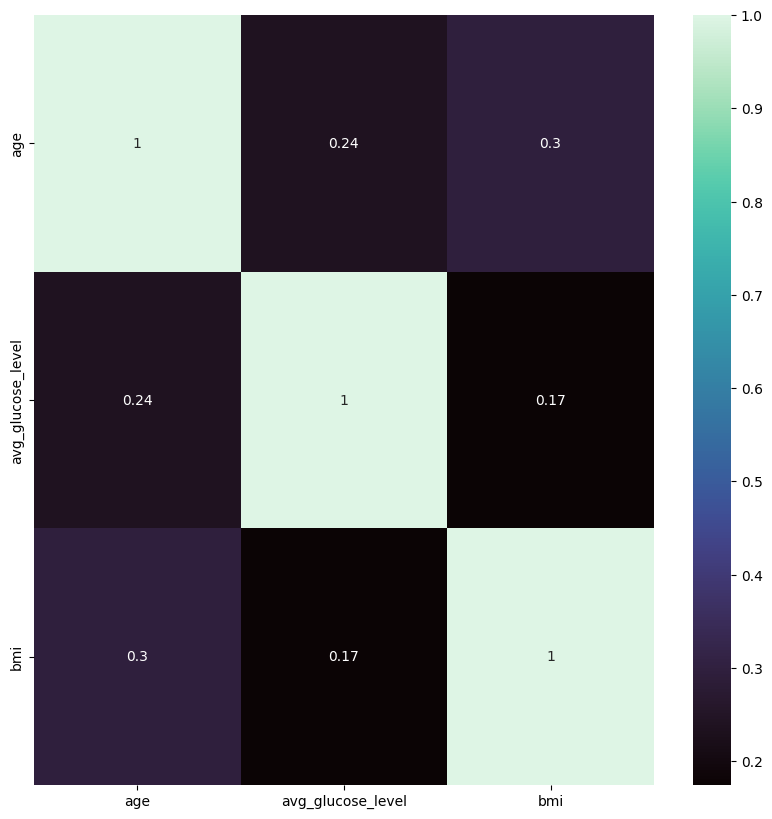

In [338]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap = "mako", annot= True)

> All the variable doesn't seems to have a strong correlation to each

#II. Data preperation
Now, we will work with the data to see the data patterns better
##1. Data cleaning
In this step, we will remove all of the outliers and deal with our missing value

First, we detect the outliers from the boxplot above using the **interquantile method**.

the formula will be: **IQR = Q3 - Q!**

In [339]:
IQR = df[outlier].quantile(0.75) - df[outlier].quantile(0.25)
print(IQR)

avg_glucose_level    36.805
bmi                   9.300
dtype: float64


Next we will respectively calculate the upper/lower bound of each variable

In [340]:
# Let's find outliers values of avg_glucose_level
up_agl = round(df['avg_glucose_level'].quantile(0.25) - 1.5*IQR[0], 3)
lo_agl = round(df['avg_glucose_level'].quantile(0.75) + 1.5*IQR[0], 3)
print('Upper bound is:', up_agl)
print('Lower bound is:', lo_agl)

Upper bound is: 22.147
Lower bound is: 169.368


In [341]:
# Let's find outliers values of bmi
up_bmi = round(df['bmi'].quantile(0.25) - 1.5*IQR[0], 3)
lo_bmi = round(df['bmi'].quantile(0.75) + 1.5*IQR[0], 3)
print('Upper bound is:', up_bmi)
print('Lower bound is:', lo_bmi)

Upper bound is: -31.308
Lower bound is: 88.408


Now we need to check these data statistics again

In [342]:
df[outlier].describe()

,avg_glucose_level,bmi
count,4994.000000,4799.000000
mean,106.393843,29.132653
std,45.565475,7.767762
min,55.120000,11.300000
25%,77.355000,23.900000
50%,91.925000,28.300000
75%,114.160000,33.200000
max,271.740000,97.600000


> As we can see:
1.   The mimnimum of **bmi** is 11.3. Hence, the outliers will be values hỉgher than 88.408
2.   The minimum of **avg_glucose_level** is 55.12, higher than its lower bound which is 22.147. Therefore, the outliers will be values higher than 169.368











Now we can come back to the dataset and get rid of those values

In [343]:
df = df[~((df['avg_glucose_level'] > 169.368)|(df['bmi'] > 88.408))]
df.describe()

,age,avg_glucose_level,bmi
count,4366.000000,4366.000000,4232.000000
mean,41.934036,91.358676,28.535184
std,21.729236,22.460229,7.433652
min,1.000000,55.120000,11.300000
25%,24.000000,75.092500,23.400000
50%,43.000000,87.955000,27.700000
75%,58.000000,103.675000,32.500000
max,82.000000,168.680000,78.000000


After changing the statistics, let's double check if we have get rid of these outliers

<function matplotlib.pyplot.show(close=None, block=None)>

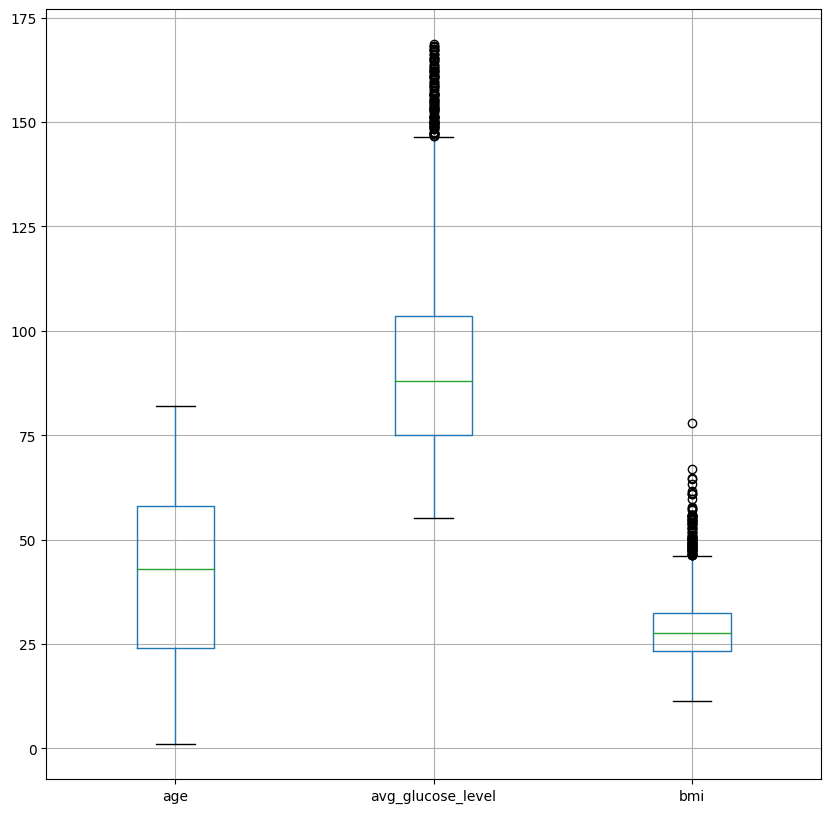

In [344]:
df.boxplot(figsize =(10,10))
plt.show

> We can still see quite a bit of outliers. This happens due to the median, upper and lower bound being changed after we remove the outliers through the interquantile method.

Let's check the missing values again after we remove the outliers

In [345]:
# let's check the null value in numerical data
df[numerical].isnull().sum()

age                    0
avg_glucose_level      0
bmi                  134
dtype: int64

In [346]:
df.shape

(4366, 11)

In [347]:
# let's check on the 'Unknown' values in 'smoking_status'
print(df['smoking_status'].value_counts(),'\n')
unknow = df[df['smoking_status'] == 'Unknown']
print('stroke probability among people with unknown smoking status','\n', unknow['stroke'].value_counts())



never smoked       1632
Unknown            1326
formerly smoked     723
smokes              685
Name: smoking_status, dtype: int64 

stroke probability among people with unknown smoking status 
 0    1293
1      33
Name: stroke, dtype: int64


> we can see that both have been decrease in number. As for the **smoking_status**, the value '*Unknown*' still doesn't appear the make significant impact on our target variable **stroke**. Hence, we can leave it as it is

> With **bmi**, we can start fill in these value with the median value of the variable.

In [348]:
med = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(med)

In [349]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##2. Data transforming
As predicting model will require input to be number, in this part, we start transfroming our categorical data into numeric ones.

For this step we will use the function **`LabelEncode`** from *scikit-learn*. This function will assigns values between 0 and number of classes - 1.

> For example, **[A, B, C]** will be decoded as **[0, 1, 2]**.

First, we call the function

In [350]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

Now, we will fit and transform the desire data variable and show the result

In [351]:
for i in df[categorical].columns:
  df[i] = lb_encoder.fit_transform(df[i])

In [352]:
for i in df[categorical]:
  print(i, ':', sorted(df[i].unique()))

gender : [0, 1]
hypertension : [0, 1]
heart_disease : [0, 1]
ever_married : [0, 1]
work_type : [0, 1, 2, 3, 4]
Residence_type : [0, 1]
smoking_status : [0, 1, 2, 3]
stroke : [0, 1]


In [353]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80,0,1,1,2,0,105.92,32.5,2,1
6,1,74,1,1,1,2,0,70.09,27.4,2,1
7,0,69,0,0,0,2,1,94.39,22.8,2,1
8,0,59,0,0,1,2,0,76.15,27.7,0,1
9,0,78,0,0,1,2,1,58.57,24.2,0,1


> It can be seen that our data are all numeric now.

##3. Data scaling
Since our data variables have different scales, we will scale them to a certain


Only input variables need to be rescaled, we need a subset of all the input

In [354]:
df.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

Since we have change out categorical values in to numeric value and most of them vary from 0 to 1, it's reasonable for us to rescale our original numerical data to 0 to 1 using normalisation

In [355]:
for x in numerical:
  xmin = df[x].min()
  xmax = df[x].max()
  df[x] = round(((df[x] -xmin)/(xmax - xmin)),4)

In [356]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,0.9753,0,1,1,2,0,0.4473,0.3178,2,1
6,1,0.9012,1,1,1,2,0,0.1318,0.2414,2,1
7,0,0.8395,0,0,0,2,1,0.3458,0.1724,2,1
8,0,0.7160,0,0,1,2,0,0.1852,0.2459,0,1
9,0,0.9506,0,0,1,2,1,0.0304,0.1934,0,1


In [357]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000
mean,0.402428,0.505358,0.076500,0.039624,0.641319,2.146816,0.507558,0.319115,0.258016,1.383875,0.037563
std,0.490443,0.268264,0.265827,0.195097,0.479668,1.080589,0.500000,0.197783,0.109748,1.076099,0.190159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.284000,0.000000,0.000000,0.000000,2.000000,0.000000,0.175900,0.184400,0.000000,0.000000
50%,0.000000,0.518500,0.000000,0.000000,1.000000,2.000000,1.000000,0.289150,0.245900,2.000000,0.000000
75%,1.000000,0.703700,0.000000,0.000000,1.000000,3.000000,1.000000,0.427550,0.315925,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000


#III. Train model
Finally, we start training our model using machine learning algorithms.

Since the target output **stroke** has class values (0 or 1), hence this is a **classification** task.
> We can start by using **Logistic Regression**

First, Let's name `x` and `y` as our input and output respectively

In [358]:
x = df.drop('stroke', axis = 1 )
y = df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.4, random_state=5)

> We keep 40% of our data for testing through the use of `test_size`. `random_state` is set as an integer to make sure the data is randomly generated the same way verytime we run the code, in this case we use 5.

> **stroke** also has a big differences in the number of occurence between 2 classes, Hence `stratify = y` was used to make sure the test data will represent the same proportions.

Logistic regression algorithms is mainly used for classification problems which will calculate the probability of the datapoints belong to each class and then make the final decision by taking the highest probability.

Let's create a Logistic Regression model:

In [359]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression(random_state = 5)
lg_reg.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [360]:
from sklearn.metrics import accuracy_score
y_pre = lg_reg.predict(X_test)
print(accuracy_score(y_test, y_pre))

0.962381419692509


> Here, we will use the accuracy score to see how accurately the model can predict on the **test set** when trained on the **train set**.

> As displayed, the logistic regression model can predict whether it rains tomorrow or not with the accuracy of 96.2%

In [361]:
print("Test score:", lg_reg.score(X_test, y_test))
print("Train score:", lg_reg.score(X_train, y_train))

Test score: 0.962381419692509
Train score: 0.9625668449197861


> The scores on both training set and test set are **approximately the same**. Therefore, we can conlcude that this model still work well with unseen data.

Now, we can plot a **confusion matrix** and observe the prediction ratio

In [362]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pre)

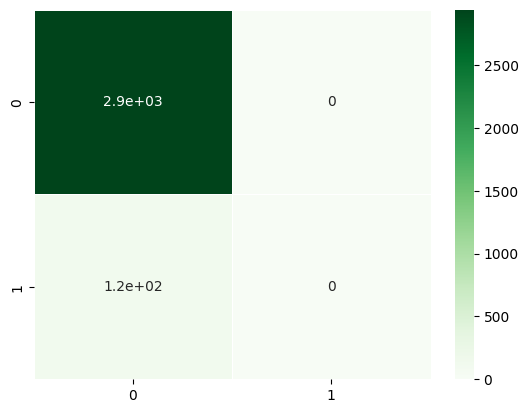

In [363]:
sns.heatmap(cfm, annot=True, linewidths=.5, cmap = 'Greens')
plt.show()

The heatmap present that:
*   1700 cases were correctly classified as '**No**'
*   66 of them were wrongly classified as '**No**'
*   None of them were classified as '**Yes**'





Let's calculate the precision and recall score for this model. In this case, the "No" will be negative class while "Yes" will be our positive class.

We will use the classification_report from sklearn.metrics library

In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2942
           1       0.00      0.00      0.00       115

    accuracy                           0.96      3057
   macro avg       0.48      0.50      0.49      3057
weighted avg       0.93      0.96      0.94      3057



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> We can see that the this model is better at predicting the person won't have stroke since all the values for '*0*' are higher than that of '*1*'.

> However, The model seems to have all 0 score for '*1*' which make the precision of this model seems questionable.

